<a href="https://colab.research.google.com/github/Karthikk0844/EXPAINABLE-AI/blob/main/LAB_07_EXPLAINABLEAI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install dice-ml --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 28.9 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import dice_ml

In [ ]:
df = pd.read_csv("/content/survey lung cancer.csv")
print("Dataset Shape:", df.shape)
print(df.head())

Dataset Shape: (309, 16)
  GENDER  AGE  SMOKING  YELLOW_FINGERS  ANXIETY  PEER_PRESSURE  \
0      M   69        1               2        2              1   
1      M   74        2               1        1              1   
2      F   59        1               1        1              2   
3      M   63        2               2        2              1   
4      F   63        1               2        1              1   

   CHRONIC DISEASE  FATIGUE   ALLERGY   WHEEZING  ALCOHOL CONSUMING  COUGHING  \
0                1         2         1         2                  2         2   
1                2         2         2         1                  1         1   
2                1         2         1         2                  1         2   
3                1         1         1         1                  2         1   
4                1         1         1         2                  1         2   

   SHORTNESS OF BREATH  SWALLOWING DIFFICULTY  CHEST PAIN LUNG_CANCER  
0                  

In [ ]:
target_col = "LUNG_CANCER"
y = df[target_col]
X = df.drop(columns=[target_col])

In [ ]:
label_enc = LabelEncoder()
y_enc = label_enc.fit_transform(y)
print("\nLabel Mapping:", dict(zip(label_enc.classes_, label_enc.transform(label_enc.classes_))))


Label Mapping: {'NO': np.int64(0), 'YES': np.int64(1)}


In [ ]:
# Define features (X) and target (y)
target_col = "LUNG_CANCER"
y = df[target_col]
X = df.drop(columns=[target_col])

# Handle missing values in 'alcohol_consumption' by filling with the mode
if 'ALCOHOL CONSUMING' in X.columns:
    X['ALCOHOL CONSUMING'] = X['ALCOHOL CONSUMING'].fillna(X['ALCOHOL CONSUMING'].mode()[0])
else:
    print("'ALCOHOL CONSUMING' column not found in X. Skipping missing value imputation for this column.")

# Perform one-hot encoding on categorical columns
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled_df, y_enc, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_enc, test_size=0.2, random_state=42)

In [ ]:
models = {
    "Logistic Regression": LogisticRegression(max_iter=2000, multi_class="multinomial"),
    "Random Forest": RandomForestClassifier(n_estimators=200, random_state=42)
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    preds = model.predict(X_test)

    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, preds),
        "Precision": precision_score(y_test, preds, average="macro"),
        "Recall": recall_score(y_test, preds, average="macro"),
        "F1 Score": f1_score(y_test, preds, average="macro")
    })

    print(f"\n=== Classification Report: {name} ===")
    print(classification_report(y_test, preds, target_names=label_enc.classes_))

results_df = pd.DataFrame(results)
print("\n=== Model Performance Summary ===")
print(results_df)

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:1237: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, binary problems will be fit as proper binary  logistic regression models (as if multi_class='ovr' were set). Leave it to its default value to avoid this warning.
  warnings.warn(



=== Classification Report: Logistic Regression ===
              precision    recall  f1-score   support

          NO       1.00      0.50      0.67         2
         YES       0.98      1.00      0.99        60

    accuracy                           0.98        62
   macro avg       0.99      0.75      0.83        62
weighted avg       0.98      0.98      0.98        62


=== Classification Report: Random Forest ===
              precision    recall  f1-score   support

          NO       0.50      0.50      0.50         2
         YES       0.98      0.98      0.98        60

    accuracy                           0.97        62
   macro avg       0.74      0.74      0.74        62
weighted avg       0.97      0.97      0.97        62


=== Model Performance Summary ===
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.983871   0.991803  0.750000  0.829201
1        Random Forest  0.967742   0.741667  0.741667  0.741667


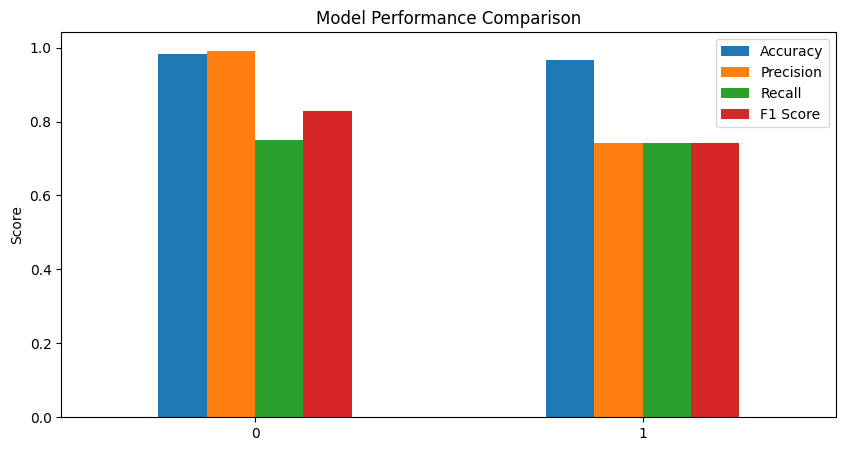

In [ ]:
results_df.plot(kind='bar', figsize=(10,5))
plt.title("Model Performance Comparison")
plt.ylabel("Score")
plt.xticks(rotation=0)
plt.show()

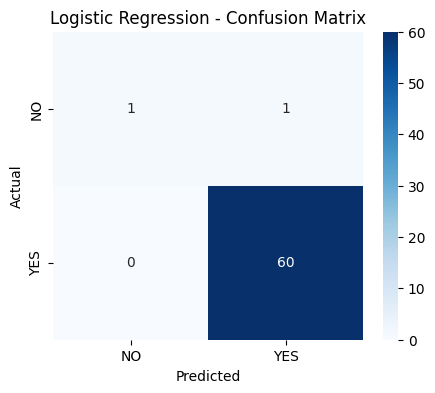

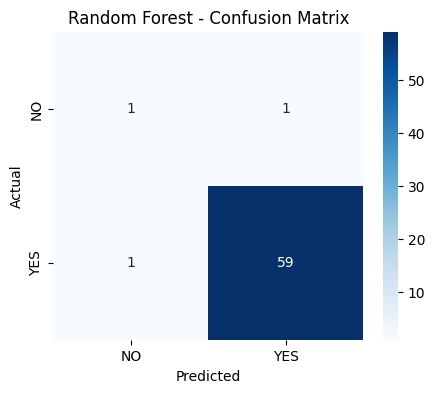

In [ ]:
for name, model in models.items():
    preds = model.predict(X_test)
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap="Blues",
                xticklabels=label_enc.classes_,
                yticklabels=label_enc.classes_)
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

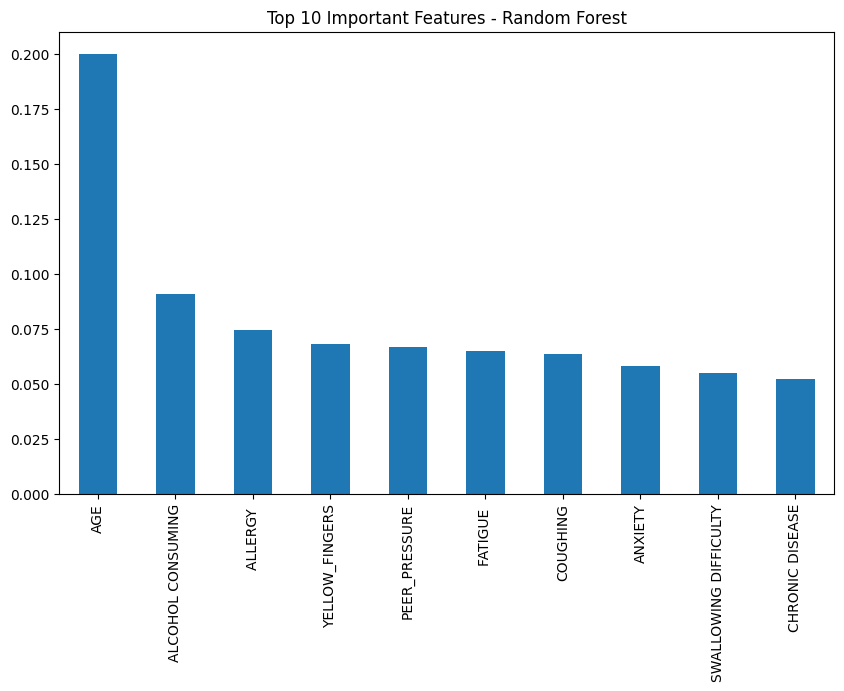

In [ ]:
plt.figure(figsize=(10,6))
importances = models["Random Forest"].feature_importances_
feat_imp = pd.Series(importances, index=X.columns).sort_values(ascending=False)
feat_imp[:10].plot(kind='bar')
plt.title("Top 10 Important Features - Random Forest")
plt.show()

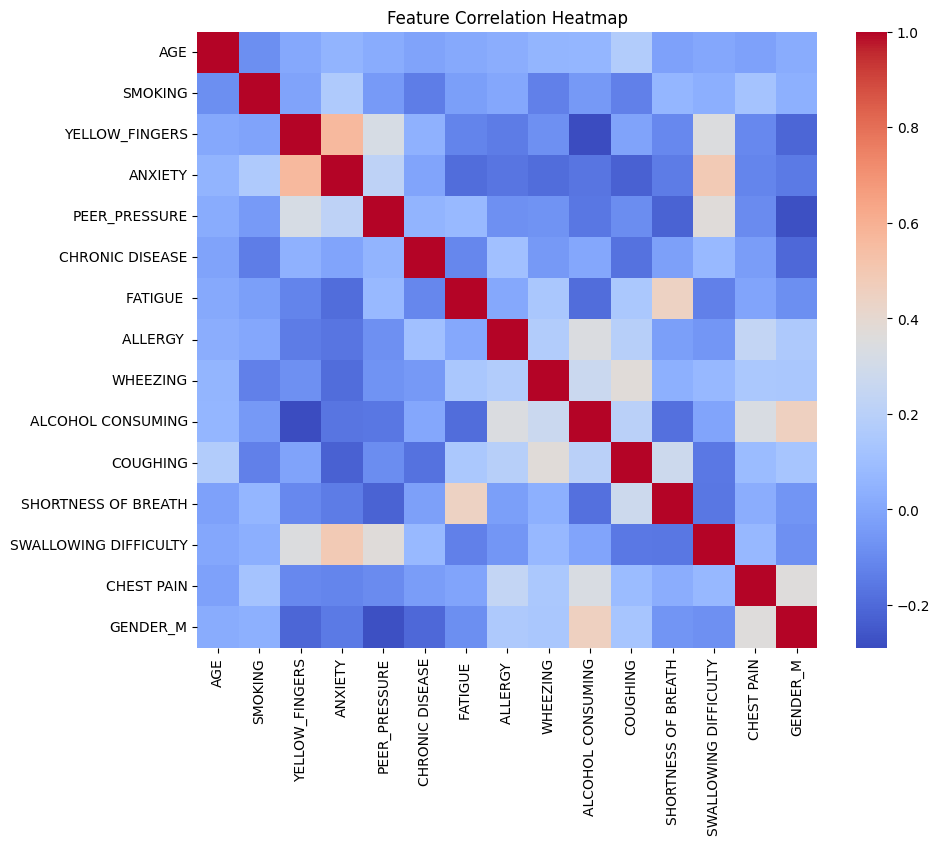

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(pd.DataFrame(X_scaled, columns=X.columns).corr(), cmap="coolwarm")
plt.title("Feature Correlation Heatmap")
plt.show()

In [ ]:
print(label_enc.classes_)

['NO' 'YES']
